In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, random, uniform
from scipy import integrate

seed(69420)

%matplotlib inline

# Montecarlo Integration

The expected value of a function $f(x)$ over an interval [a,b] on $x$ (on one dimention), is given by

$$ <x> = \frac{1}{b-a}\int_{a}^{b}\text{d}x f(x) $$

The expected value can be estimated by

$$ <x> = \frac{1}{N}\sum_{i=1}^{N}f(x_{i}) $$

Therefore, the integral may be estimated by the means of the two latter formulas

$$ \therefore E = \int_{a}^{b}\text{d}x f(x) \approx (b-a) \frac{1}{N}\sum_{i=1}^{N}f(x_{i})$$

In [308]:
def montecarlo_integration(f, interval, N):
    ''' montecarlo integration function '''
    
    a, b = interval
    
    E = 0 # Integral estimate
    S2 = 0 # Variance estimate
    
    for i in range(N):     
        x = (b-a)*random()+a # random number between a and b
        E += f(x)
        S2 += f(x)**2
                
    E = (b-a)*E/N
    S2 = S2/N - E**2
        
    return E, S2

def montecarlo_stratSampl(f, intervals, N):
    ''' montecarlo stratified sampling method for variance reduction '''
    
    int_vol = [[intervals[i],intervals[i+1]] for i in range(len(intervals)-1)]
    vol = [intervals[i+1] - intervals[i] for i in range(len(intervals)-1)]
    
    E = 0
    S2 = 0
    
    for volMj, intv, Nj in zip(vol, int_vol, N):
        
        Ej, S2j = montecarlo_integration(f, intv, Nj)
        
        E += Ej
        S2 += S2j
    
    return E, S2


def montecarlo_3D(f, intervalx, intervaly, intervalz, N):
    ''' montecarlo integration function '''
    
    ax, bx = intervalx
    ay, by = intervaly
    az, bz = intervalz
    
    E = 0 # Integral estimate
    S2 = 0 # Variance estimate
    
    for i in range(N):     
        x = (bx-ax)*random()+ax # random number between a and b
        y = (by-ay)*random()+ay
        z = (bz-az)*random()+az
        E += f(x,y,z)
        S2 += f(x,y,z)**2
                
    E = (bx-ax)*(by-ay)*(bz-az)*E/N
    S2 = S2/N - E**2
        
    return E, S2

In [309]:
# Functions to apply montecarlo integration on

f1 = lambda x: x**-3
f2 = lambda x: x**-0.5
f3 = lambda x,y,z: x**-1 + y + z**2

**************************************************
Number of iterations: 10
Function 	 Integral Estimate 	 Integral value 	 Variance Estimate
F1 		 0.11577862401975594 	 0.495 	 	 	 -0.08604529368273858
F2 		 3.85244521229768 	 4.32455532033676 	 -18.235353042708663
**************************************************
Number of iterations: 200
Function 	 Integral Estimate 	 Integral value 	 Variance Estimate
F1 		 0.5196185073211254 	 0.495 	 	 	 -0.2590331849683014
F2 		 4.227828234368757 	 4.32455532033676 	 -18.72070768327082
**************************************************
Number of iterations: 3000
Function 	 Integral Estimate 	 Integral value 	 Variance Estimate
F1 		 0.4676024716578566 	 0.495 	 	 	 -0.21779980143264138
F2 		 4.323397783223832 	 4.32455532033676 	 -18.622599142838148
**************************************************
Number of iterations: 40000
Function 	 Integral Estimate 	 Integral value 	 Variance Estimate
F1 		 0.49163570425730285 	 0.495 	 	 	 -0.2165180543

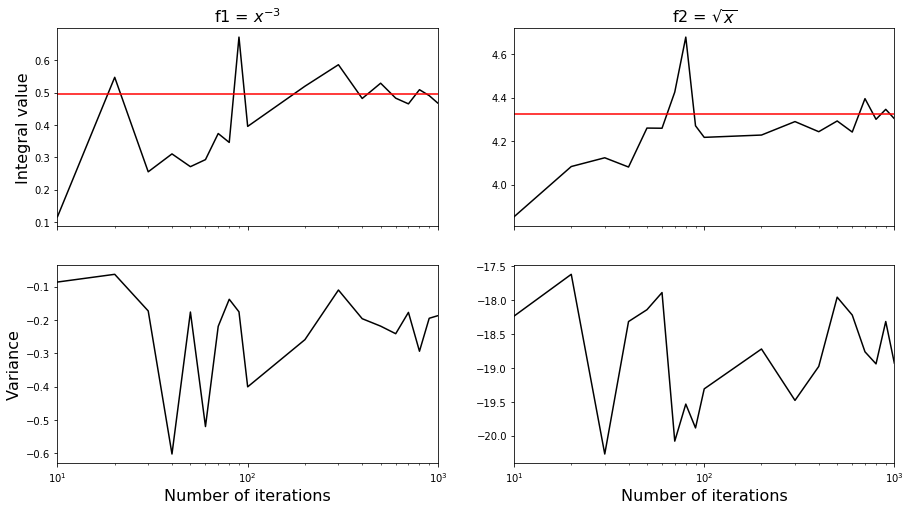

In [310]:
# Montecarlo integration 1D

N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,\
     2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000,\
     90000, 100000]

interval = [1,10]

I = [0,0]
E = [[],[]]
S2 = [[],[]]

i = 0

for n in N:
    
    E_f1 = montecarlo_integration(f1, interval, n)[0]
    E_f2 = montecarlo_integration(f2, interval, n)[0]
    
    S2_f1 = montecarlo_integration(f1, interval, n)[1]
    S2_f2 = montecarlo_integration(f2, interval, n)[1]
    
    I_f1 = integrate.quad(f1, interval[0], interval[1])[0]
    I_f2 = integrate.quad(f2, interval[0], interval[1])[0]
    
    I[0], I[1] = I_f1, I_f2
    
    E[0].append(E_f1)
    E[1].append(E_f2)
    
    S2[0].append(S2_f1)
    S2[1].append(S2_f2)
    
    if i%10 == 0:
    
        print("*"*50)
        print("Number of iterations: {}".format(n))
        print("Function \t Integral Estimate \t Integral value \t Variance Estimate")
        print("F1 \t\t {} \t {} \t \t \t {}\nF2 \t\t {} \t {} \t {}".format(E_f1, I_f1, S2_f1, E_f2, I_f2, S2_f2))
        
    i += 1
    

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,8), sharex=True)

ax[0,0].plot(N,E[0],'-k')
ax[0,0].axhline(y=I[0], color="red")
ax[0,0].set_title(r"f1 = $x^{-3}$", fontsize=16)
ax[0,0].set_ylabel("Integral value", fontsize=16)

ax[1,0].plot(N,S2[0],'-k')
ax[1,0].set_xlabel("Number of iterations", fontsize=16)
ax[1,0].set_ylabel("Variance", fontsize=16)

ax[0,1].plot(N,E[1],'-k')
ax[0,1].axhline(y=I[1], color="red")

ax[0,1].set_title(r"f2 = $\sqrt{x}$", fontsize=16)

ax[1,1].plot(N,S2[1],'-k')
ax[1,1].set_xlabel("Number of iterations", fontsize=16)

for axis in ax:
    for ax in axis:
        ax.set_xlim(10,1000)
        ax.set_xscale("log")


In [324]:
# Montecarlo 3D

N = [10, 1000, 1000, 10000]

intervalx = [1,10]
intervaly = [0,2]
intervalz = [0,2]

I = integrate.nquad(f3, [intervalx,intervaly,intervalz])[0]

for n in N:
    
    E = montecarlo_3D(f3, intervalx, intervaly, intervalz, n)[0]
    S2 = montecarlo_3D(f3, intervalx, intervaly, intervalz, n)[0]
    
    print("*"*50)
    print("Number of iterations: {}".format(n))
    print("Integral Estimate \t Integral value \t Variance Estimate")
    print("{} \t {} \t {}".format(E, I, S2))

**************************************************
Number of iterations: 10
Integral Estimate 	 Integral value 	 Variance Estimate
68.81263520704714 	 93.2103403719762 	 114.83896206764693
**************************************************
Number of iterations: 1000
Integral Estimate 	 Integral value 	 Variance Estimate
93.10372553928435 	 93.2103403719762 	 94.38521348682055
**************************************************
Number of iterations: 1000
Integral Estimate 	 Integral value 	 Variance Estimate
91.67112692163505 	 93.2103403719762 	 93.03978313076588
**************************************************
Number of iterations: 10000
Integral Estimate 	 Integral value 	 Variance Estimate
93.09635468424838 	 93.2103403719762 	 92.97361875459882


In [317]:
# Stratified sampling

N = [10000, 1000, 100, 10]

interval = [1, 2, 8, 10]

I = [0,0]
E = [[],[]]
S2 = [[],[]]

    
E_f1 = montecarlo_stratSampl(f1, interval, N)[0]
E_f2 = montecarlo_stratSampl(f2, interval, N)[0]
    
S2_f1 = montecarlo_stratSampl(f1, interval, N)[1]
S2_f2 = montecarlo_stratSampl(f2, interval, N)[1]
    
I_f1 = integrate.quad(f1, interval[0], interval[-1])[0]
I_f2 = integrate.quad(f2, interval[0], interval[-1])[0]
    
    
print("*"*50)
print("Number of iterations: {}".format(n))
print("Function \t Integral Estimate \t Integral value \t Variance Estimate")
print("F1 \t\t {} \t {} \t \t \t {}\nF2 \t\t {} \t {} \t {}".format(E_f1, I_f1, S2_f1, E_f2, I_f2, S2_f2))

**************************************************
Number of iterations: 10000
Function 	 Integral Estimate 	 Integral value 	 Variance Estimate
F1 		 0.4940275219325799 	 0.495 	 	 	 0.040647392783481305
F2 		 4.300517078581346 	 4.32455532033676 	 -8.15411241240402


# Metropolis

In [241]:
def PDF(th, u=0, sig=0.1):
    ''' Probability density function of the scattering angles of the Rutherford experiment '''
    
    arg = -(th - u)**2/2/sig**2
    exp = np.exp(arg)

    return exp/sig/np.sqrt(2*np.pi)

In [12]:
def next_state(theta, pdf=PDF,thRange=[-np.pi, np.pi]):
    ''' Metropolis method to calculate the next state of the system '''

    thetaPrime = uniform(low=thRange[0], high=thRange[1])
    
    deltaS = -np.log(pdf(thetaPrime)/pdf(theta))

    if deltaS < 0:
        return thetaPrime

    else:

        p = pdf(thetaPrime)/pdf(theta)

        accept = 0 if uniform(0,1)>p else 1 #binomial(1,p)

        return accept*thetaPrime + (1-accept)*theta

Text(0.5, 0, 'Scattering angle')

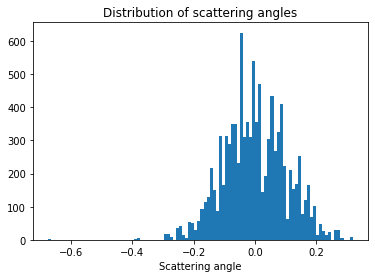

In [47]:
theta = [uniform(low=-np.pi, high=np.pi)]

for i in range(10000):

    theta.append(next_state(theta[i]))


fig, ax = plt.subplots()
    
ax.hist(theta, bins=100)
ax.set_title("Distribution of scattering angles")
ax.set_xlabel("Scattering angle")